In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform
from math import isnan
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country = pd.read_csv(r"C:\Users\pc-pc\Downloads\Country-data.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
country.info()
#we see that there is no NULL or NAN value to eliminate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
country.shape

(167, 10)

In [5]:
country.isna().sum()
# result - no NULL value

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#hence, there is no NAN or NULL values to be discarded.

In [7]:
data = country.drop(['country'],axis = 1)
country_val = pd.DataFrame([country['country']])
country_val = country_val.T

In [8]:
country_val.head()
#this DataFRame is gonna have only the stripped out country value in them

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [9]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(data)

In [10]:
data2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [11]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
#Performing the PCA
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [13]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [14]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

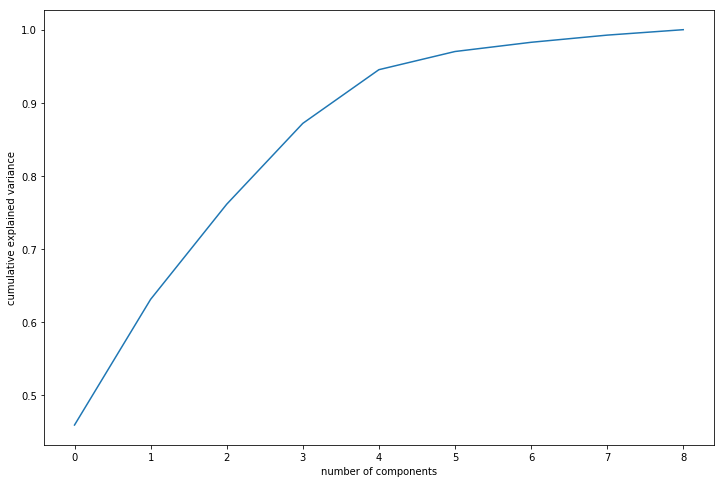

In [15]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [16]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.419519,0.192884,-0.029544
1,exports,0.283897,0.613163,0.144761
2,health,0.150838,-0.243087,-0.596632
3,imports,0.161482,0.671821,-0.299927
4,income,0.398441,0.022536,0.301548
5,inflation,-0.193173,-0.008404,0.642520
6,life_expec,0.425839,-0.222707,0.113919
7,total_fer,-0.403729,0.155233,0.019549
8,gdpp,0.392645,-0.046022,0.122977


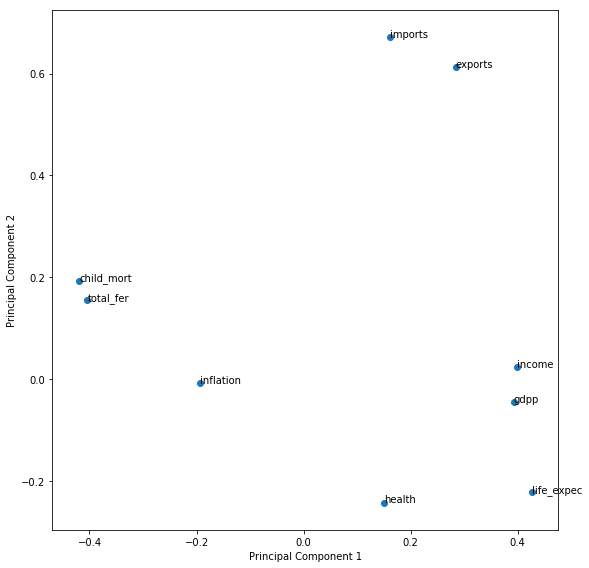

In [17]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [18]:
#Finally let's go ahead and do dimenstionality reduction using the three Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [19]:
df_pca = pca_final.fit_transform(data2)
df_pca.shape

(167, 3)

In [20]:
corrmat = np.corrcoef(df_pca.transpose())

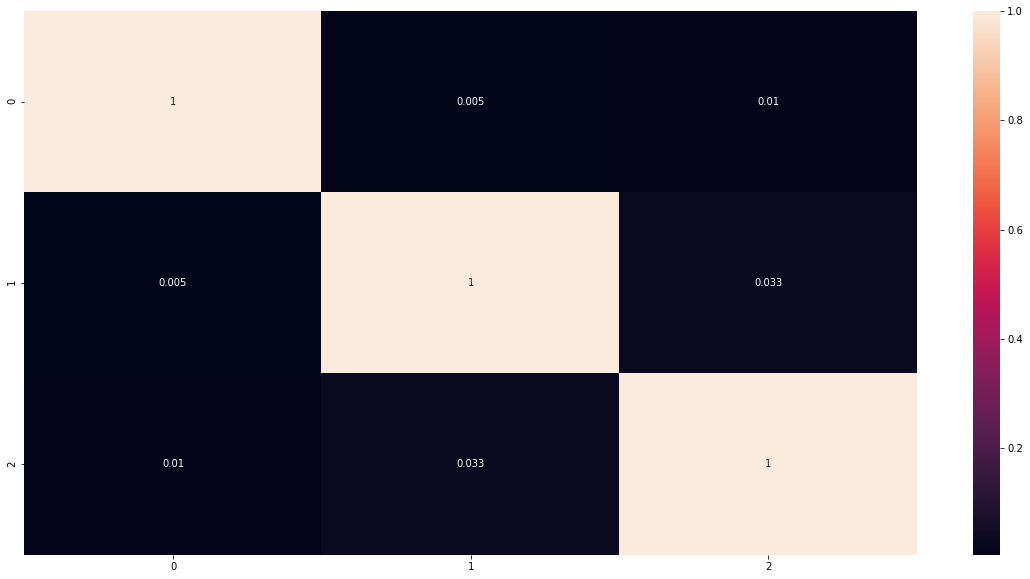

In [21]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [22]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0 - which is good


max corr: 0.03287083444738243 , min corr:  0.0


In [23]:
df_pca

array([[-2.91749135e+00,  6.78169055e-03,  1.14971930e+00],
       [ 4.27163635e-01, -8.49420650e-01, -5.24327833e-01],
       [-2.70014955e-01, -1.76265297e-01, -1.55513118e+00],
       [-2.92829056e+00,  2.20714194e+00, -4.27483560e-01],
       [ 1.02647936e+00, -7.13149952e-02, -2.86053103e-01],
       [ 4.98287465e-02, -1.41931450e+00, -1.03434181e+00],
       [-1.00471602e-01, -6.90522490e-01, -1.16099247e+00],
       [ 2.36760704e+00, -1.57222868e+00,  1.89643537e-01],
       [ 2.97960098e+00, -6.43399635e-01,  1.01531491e+00],
       [-1.69149139e-01, -1.65916842e-01, -1.00305727e+00],
       [ 1.26950310e+00, -7.39950893e-01,  3.20278150e-01],
       [ 1.67554991e+00,  8.34804347e-01, -7.81350047e-01],
       [-1.11375574e+00, -8.98759984e-01, -1.27818117e+00],
       [ 1.07708778e+00, -7.42073026e-01,  1.44272205e-01],
       [ 5.74186184e-01,  4.56051415e-01, -9.26694545e-01],
       [ 3.13413795e+00,  5.87331085e-01,  1.28120464e+00],
       [ 1.98156783e-01,  3.98086248e-01

In [24]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [25]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [26]:
pcs_df2.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


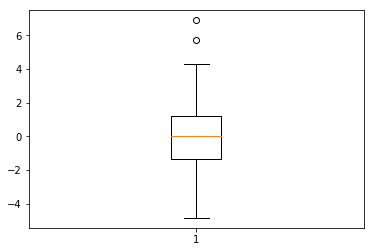

In [27]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

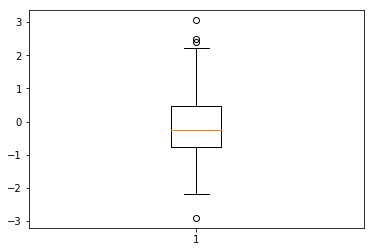

In [28]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

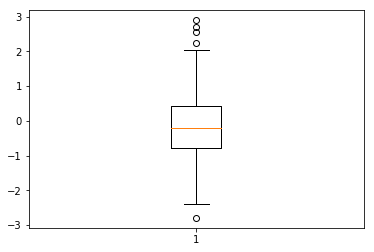

In [29]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [30]:
pcs_df2.shape

(119, 3)

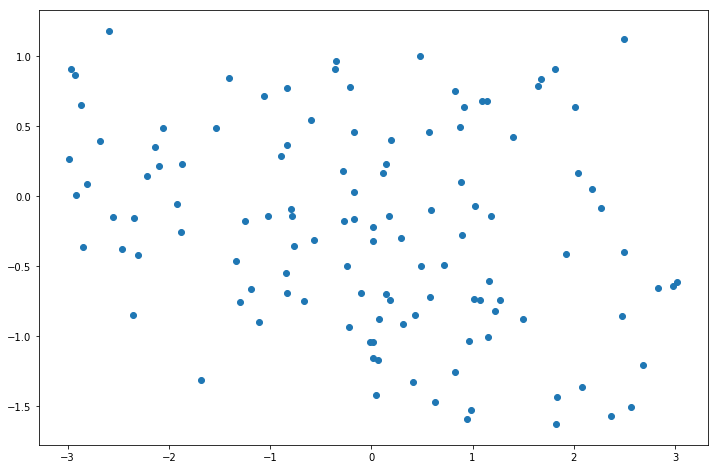

In [31]:
#Visualising the points on the PCs.
fig = plt.figure(figsize = (12,8))
plt.scatter(x='PC1',y='PC2',data=pcs_df2)

In [32]:
train_df = pcs_df2[(np.abs(stats.zscore(pcs_df2)) < 2).all(axis=1)]

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.6634048077006488

In [35]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [36]:
dat3_1 = pcs_df2

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

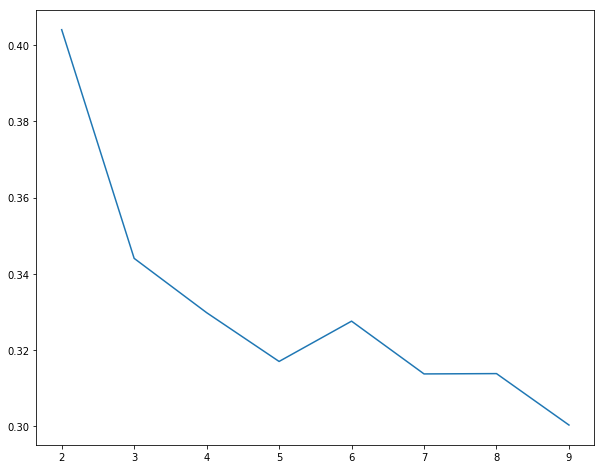

In [38]:
fig = plt.figure(figsize = (10,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

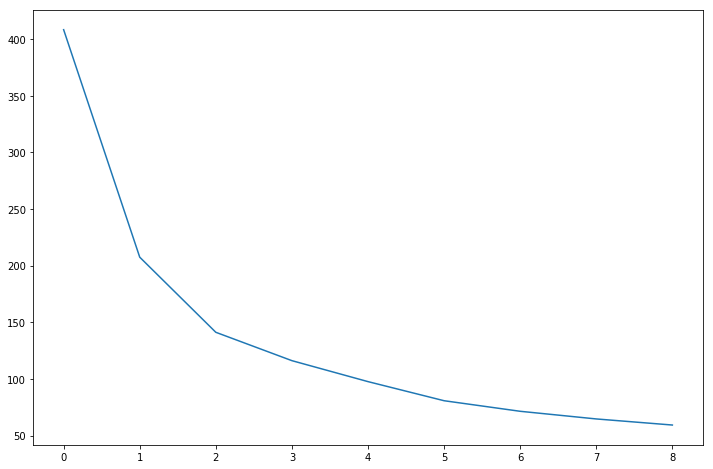

In [39]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)
fig = plt.figure(figsize = (12,8))
plt.plot(ssd)

In [40]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [41]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,0
1,0.427164,-0.849421,-0.524328,1
2,-0.270015,-0.176265,-1.555131,1
3,1.026479,-0.071315,-0.286053,1
4,0.049829,-1.419314,-1.034342,1


In [42]:
dat_km['ClusterID'].value_counts()

1    74
0    45
Name: ClusterID, dtype: int64

In [43]:
dat_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,0
1,0.427164,-0.849421,-0.524328,1
2,-0.270015,-0.176265,-1.555131,1
3,1.026479,-0.071315,-0.286053,1
4,0.049829,-1.419314,-1.034342,1


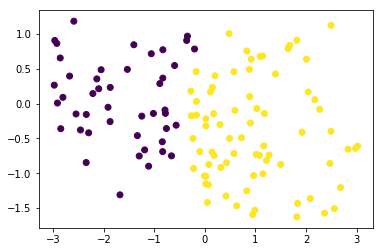

In [44]:
plt.scatter(x='PC1',y='PC2',c='ClusterID',data=dat_km)

In [45]:
dat5=pd.merge(data,dat_km, left_index=True,right_index=True)
dat5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.917491,0.006782,1.149719,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.427164,-0.849421,-0.524328,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.270015,-0.176265,-1.555131,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.026479,-0.071315,-0.286053,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.049829,-1.419314,-1.034342,1


In [46]:
dat5.drop(['PC1','PC2'],axis = 1).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC3,ClusterID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.149719,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.524328,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-1.555131,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-0.286053,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-1.034342,1


In [47]:
cluster = pd.concat([country_val, dat5], axis = 1)
cluster.drop(['PC1','PC2'],axis = 1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC3,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.149719,0.0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,-0.524328,1.0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,-1.555131,1.0
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,-0.286053,1.0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,-1.034342,1.0
5,Argentina,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,-1.160992,1.0
6,Armenia,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,0.189644,1.0
7,Australia,4.8,19.80,8.73,20.9,41400.0,1.160,82.0,1.93,51900.0,1.015315,1.0
8,Austria,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900.0,-1.003057,1.0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0,0.320278,1.0


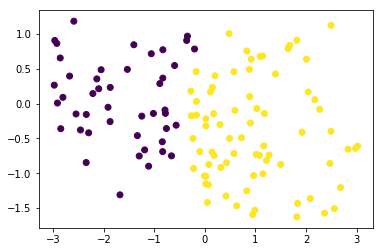

In [48]:
plt.scatter(x='PC1',y='PC2',c='ClusterID',data=cluster)

In [49]:
## right now we have carried out the K means by having k = 2 . we chose k = 2 from the plot where the graph is the highest for k = 2
## now, let us do the clustering process for the next highest k value. 

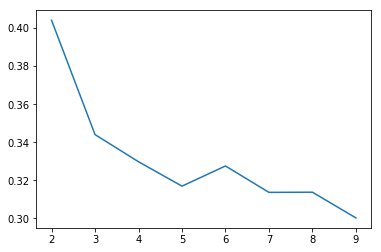

In [50]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [51]:
# the next highest K value from the plot is infered to be k = 3

In [52]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [53]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
km.columns = ['PC1', 'PC2','PC3','ClusterID']
km.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,1
1,0.427164,-0.849421,-0.524328,2
2,-0.270015,-0.176265,-1.555131,2
3,1.026479,-0.071315,-0.286053,0
4,0.049829,-1.419314,-1.034342,2


In [54]:
km['ClusterID'].value_counts()

2    50
0    39
1    30
Name: ClusterID, dtype: int64

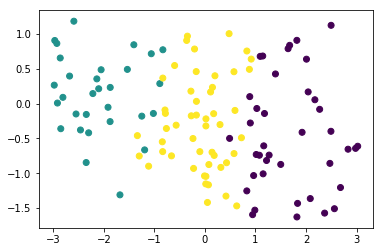

In [55]:
plt.scatter(x='PC1',y='PC2',c='ClusterID',data=km)

In [56]:
# hence according to the EVALUATION RUBIX, we have constructed ANOTHER clustering model for the same dataset , with K = 3. 

In [57]:
km.head()

,PC1,PC2,PC3,ClusterID
0,-2.917491,0.006782,1.149719,1
1,0.427164,-0.849421,-0.524328,2
2,-0.270015,-0.176265,-1.555131,2
3,1.026479,-0.071315,-0.286053,0
4,0.049829,-1.419314,-1.034342,2


In [58]:
country_val.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [59]:
km = pd.merge(country, pd.DataFrame(model_clus2.labels_), left_index=True, right_index=True)
km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [60]:
km.columns = ['country', 'child_mort', 'exports', 'health', 'imports',
              'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [61]:
km_clusters_child_mort = 	pd.DataFrame(km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(km.groupby(["ClusterID"]).gdpp.mean())

In [62]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,
               km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec,
               km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,42.787179,41.748718,6.506667,49.107692,14339.282051,6.007667,69.569231,3.053846,9714.487179
1,1,38.156667,44.326667,6.543667,46.116667,16025.933333,7.946700,71.103333,2.939667,12537.700000
2,2,42.350000,38.245980,7.068000,47.059318,17944.660000,8.942860,70.074000,2.971200,15019.860000


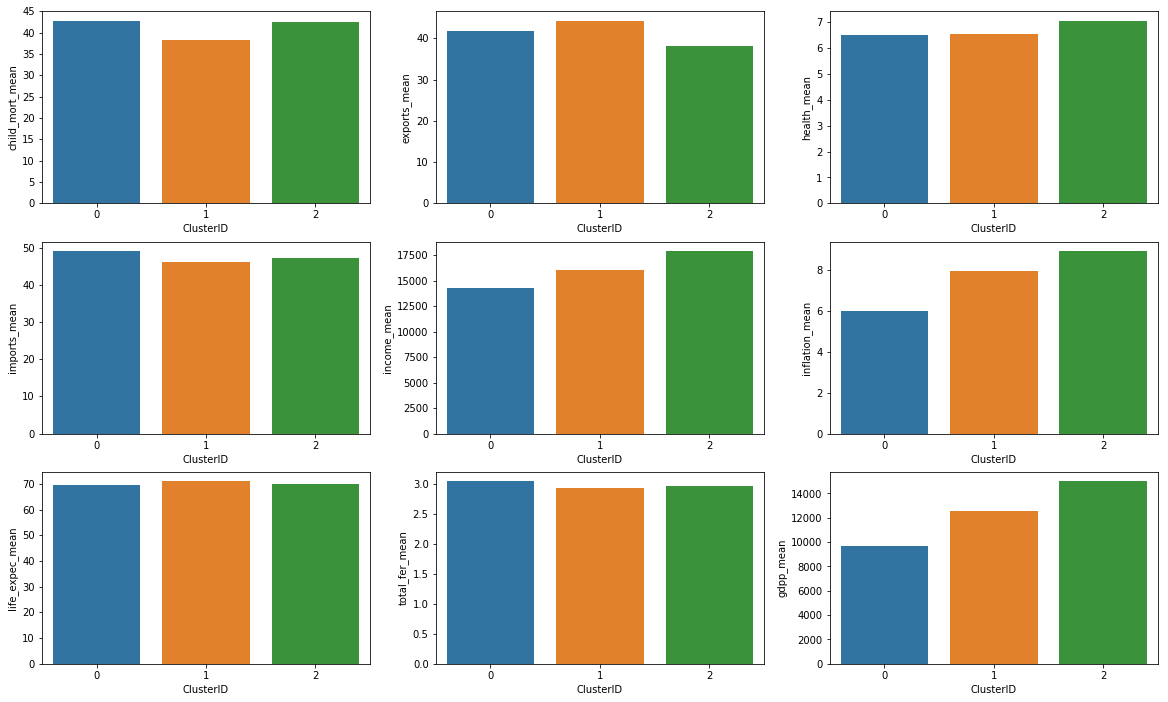

In [63]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

In [64]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
country.index = pd.RangeIndex(len(country.index))
km = pd.merge(country, pd.DataFrame(model_clus4.labels_), left_index=True, right_index=True)
km.columns = ['country', 'child_mort', 'exports', 'health', 'imports',
              'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

km_clusters_child_mort = 	pd.DataFrame(km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(km.groupby(["ClusterID"]).gdpp.mean())

In [66]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,
               km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec,
               km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,40.754545,31.600273,7.155455,42.720179,16449.000000,6.309788,71.393939,3.079091,13244.090909
1,1,44.221429,44.942857,6.274286,48.878571,17637.071429,5.229000,70.017857,3.038214,13822.071429
2,2,36.373333,46.626667,6.973000,49.120000,17685.666667,11.026067,70.850000,2.864000,13145.266667
3,3,46.646154,40.199615,6.480769,48.846154,13358.769231,8.682154,67.542308,2.996154,10624.923077


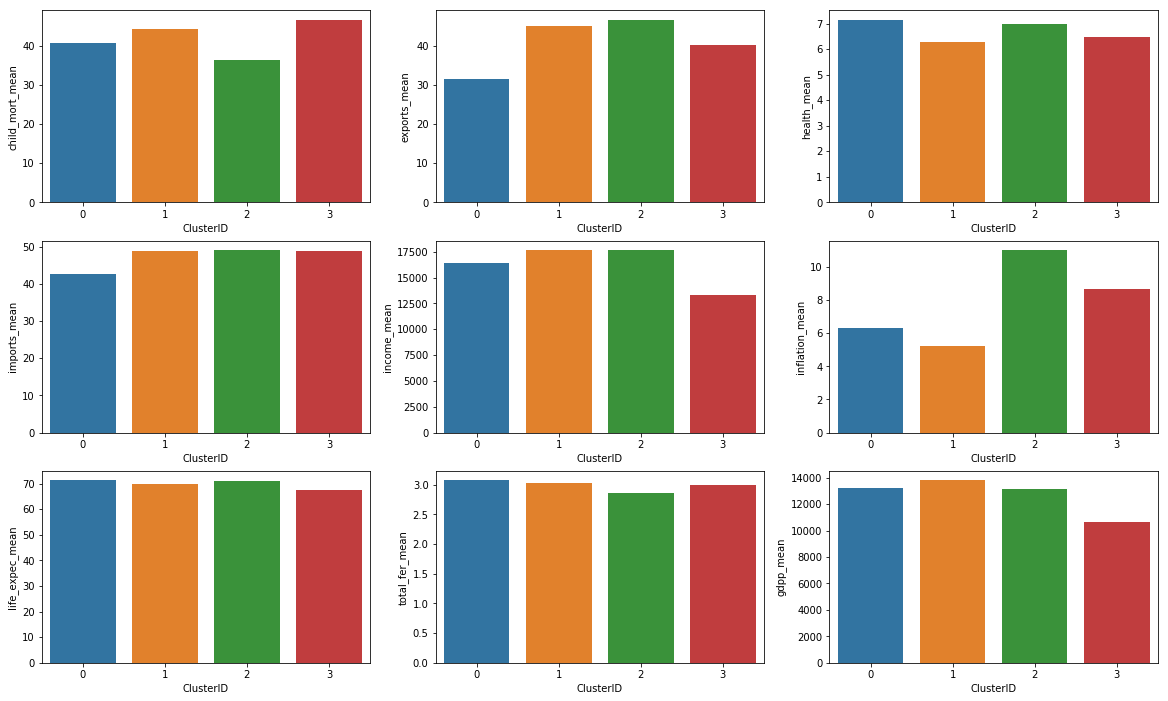

In [67]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

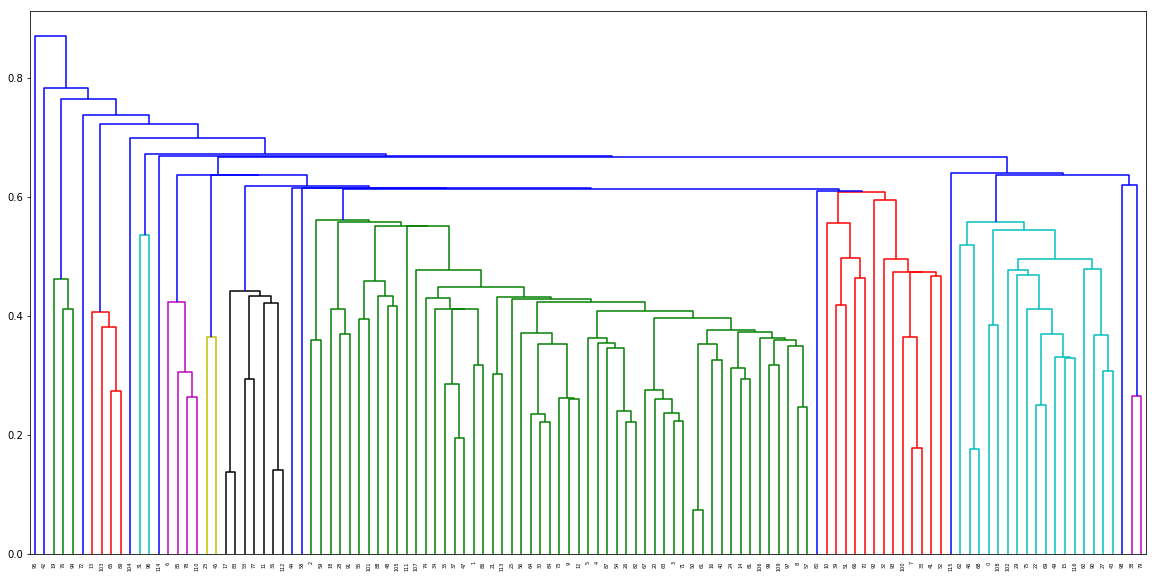

In [68]:
fig = plt.figure(figsize = (20,10))
mergings = linkage(train_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

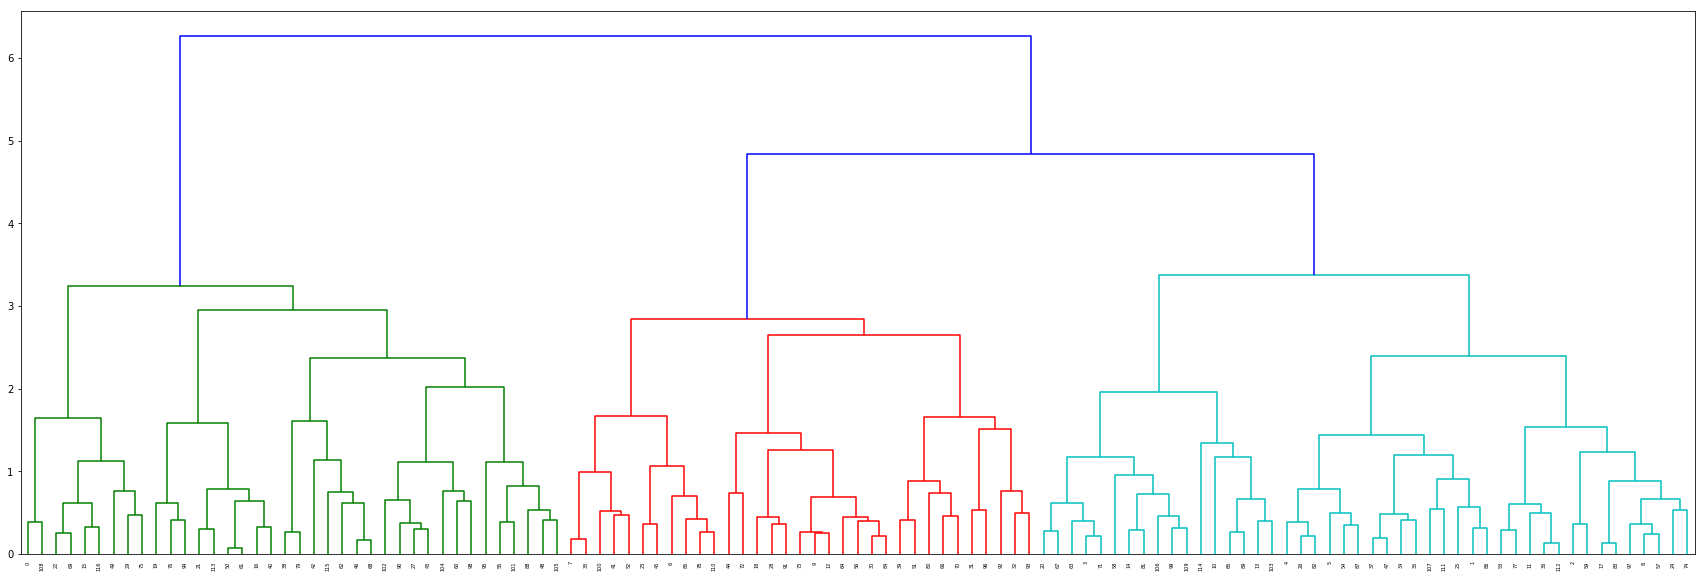

In [69]:
fig = plt.figure(figsize = (30,10))
mergings = linkage(train_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [70]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [71]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country_hc = pd.merge(country, pd.DataFrame(clusterCut), left_index=True, right_index=True)
country_hc.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
                      'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']

In [72]:
country_hc_child_mort = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
country_hc_exports = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
country_hc_health = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
country_hc_imports = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
country_hc_income = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
country_hc_inflation = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
country_hc_life_expec = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
country_hc_total_fer = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
country_hc_gdpp = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [73]:
df = pd.concat([pd.Series([0,1,2,3,4]), country_hc_child_mort, country_hc_exports, country_hc_health,
               country_hc_imports, country_hc_income, country_hc_inflation, country_hc_life_expec,
               country_hc_total_fer, country_hc_gdpp], axis=1)
df.columns = ["ClusterID", 'child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean',
              'income_mean', 'inflation_mean', 'life_expec_mean', 'total_fer_mean', 'gdpp_mean']
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,49.111111,35.677778,7.292222,39.522222,20551.111111,7.917667,69.377778,3.092222,18225.888889
1,1,43.717241,31.852724,6.976207,40.591928,16683.344828,6.469552,70.955172,3.211379,12858.310345
2,2,40.558824,41.481176,6.778235,50.435294,15571.647059,10.715059,69.729412,2.881176,13502.294118
3,3,43.772727,44.190909,6.410303,48.696970,17712.666667,5.271879,69.796970,2.875455,14302.484848
4,4,35.975862,46.099655,6.716897,52.575862,13673.793103,10.212034,69.906897,2.954138,8835.655172


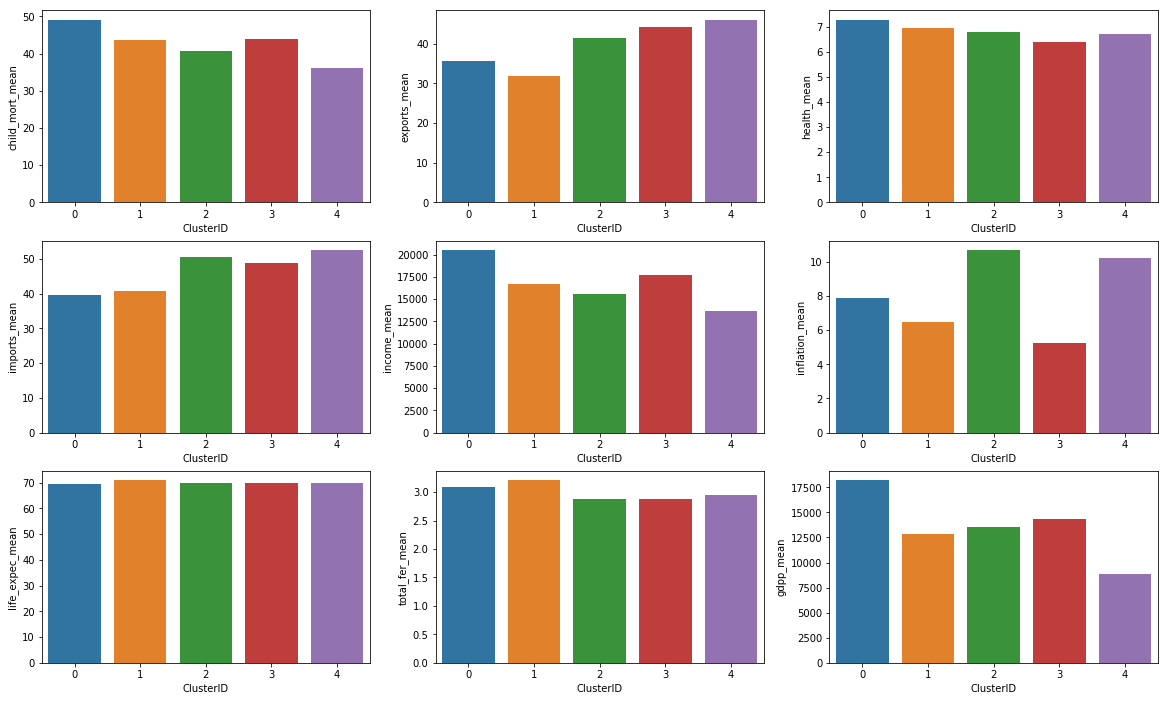

In [74]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.subplot(3,3,2)
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.subplot(3,3,3)
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.subplot(3,3,4)
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.subplot(3,3,5)
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.subplot(3,3,6)
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.subplot(3,3,7)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.subplot(3,3,8)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.subplot(3,3,9)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()